## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> </font>

# GMM Linear Classifier on MNIST with reg=0.1

##### Importing general modules.

In [1]:
import numpy as np
from sklearn import mixture
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt

### Preparing matplotlib to genrate high-quality images for the paper

In [3]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

### Set K=6 as in <a href="https://link.springer.com/article/10.1007/s11063-018-9906-5">Competitive Cross-Entropy Paper.</a>

In [4]:
C  = 10
K = 6
L = C * K
width = 28
height = 28

### Load Training and Testing Data and Normalize them

In [5]:
XTrain = sio.loadmat ('../../datasets/mnist/MnistTrainX')['MnistTrainX']
XTrain = XTrain / 255
yTrain = sio.loadmat ('../../datasets/mnist/MnistTrainY')['MnistTrainY']
XTest = sio.loadmat ('../../datasets/mnist/MnistTestX')['MnistTestX']
XTest = XTest / 255
yTest = sio.loadmat ('../../datasets/mnist/MnistTestY')['MnistTestY']
N, dim = XTrain.shape

### Loading GMM data computed on Google Colab

In [6]:
clusters = np.zeros(N, dtype = int)
with open('GMM_MNIST_6.txt', 'r') as f:
    for i in range (N):
        s = f.readline()
        clusters[i] = int(s)

### Compute means

In [7]:
means = np.zeros([L, dim])
for i in range (L):
    idx = clusters == i
    means[i,:] = np.mean (XTrain[idx,:], axis = 0)

### Show Clustering Result

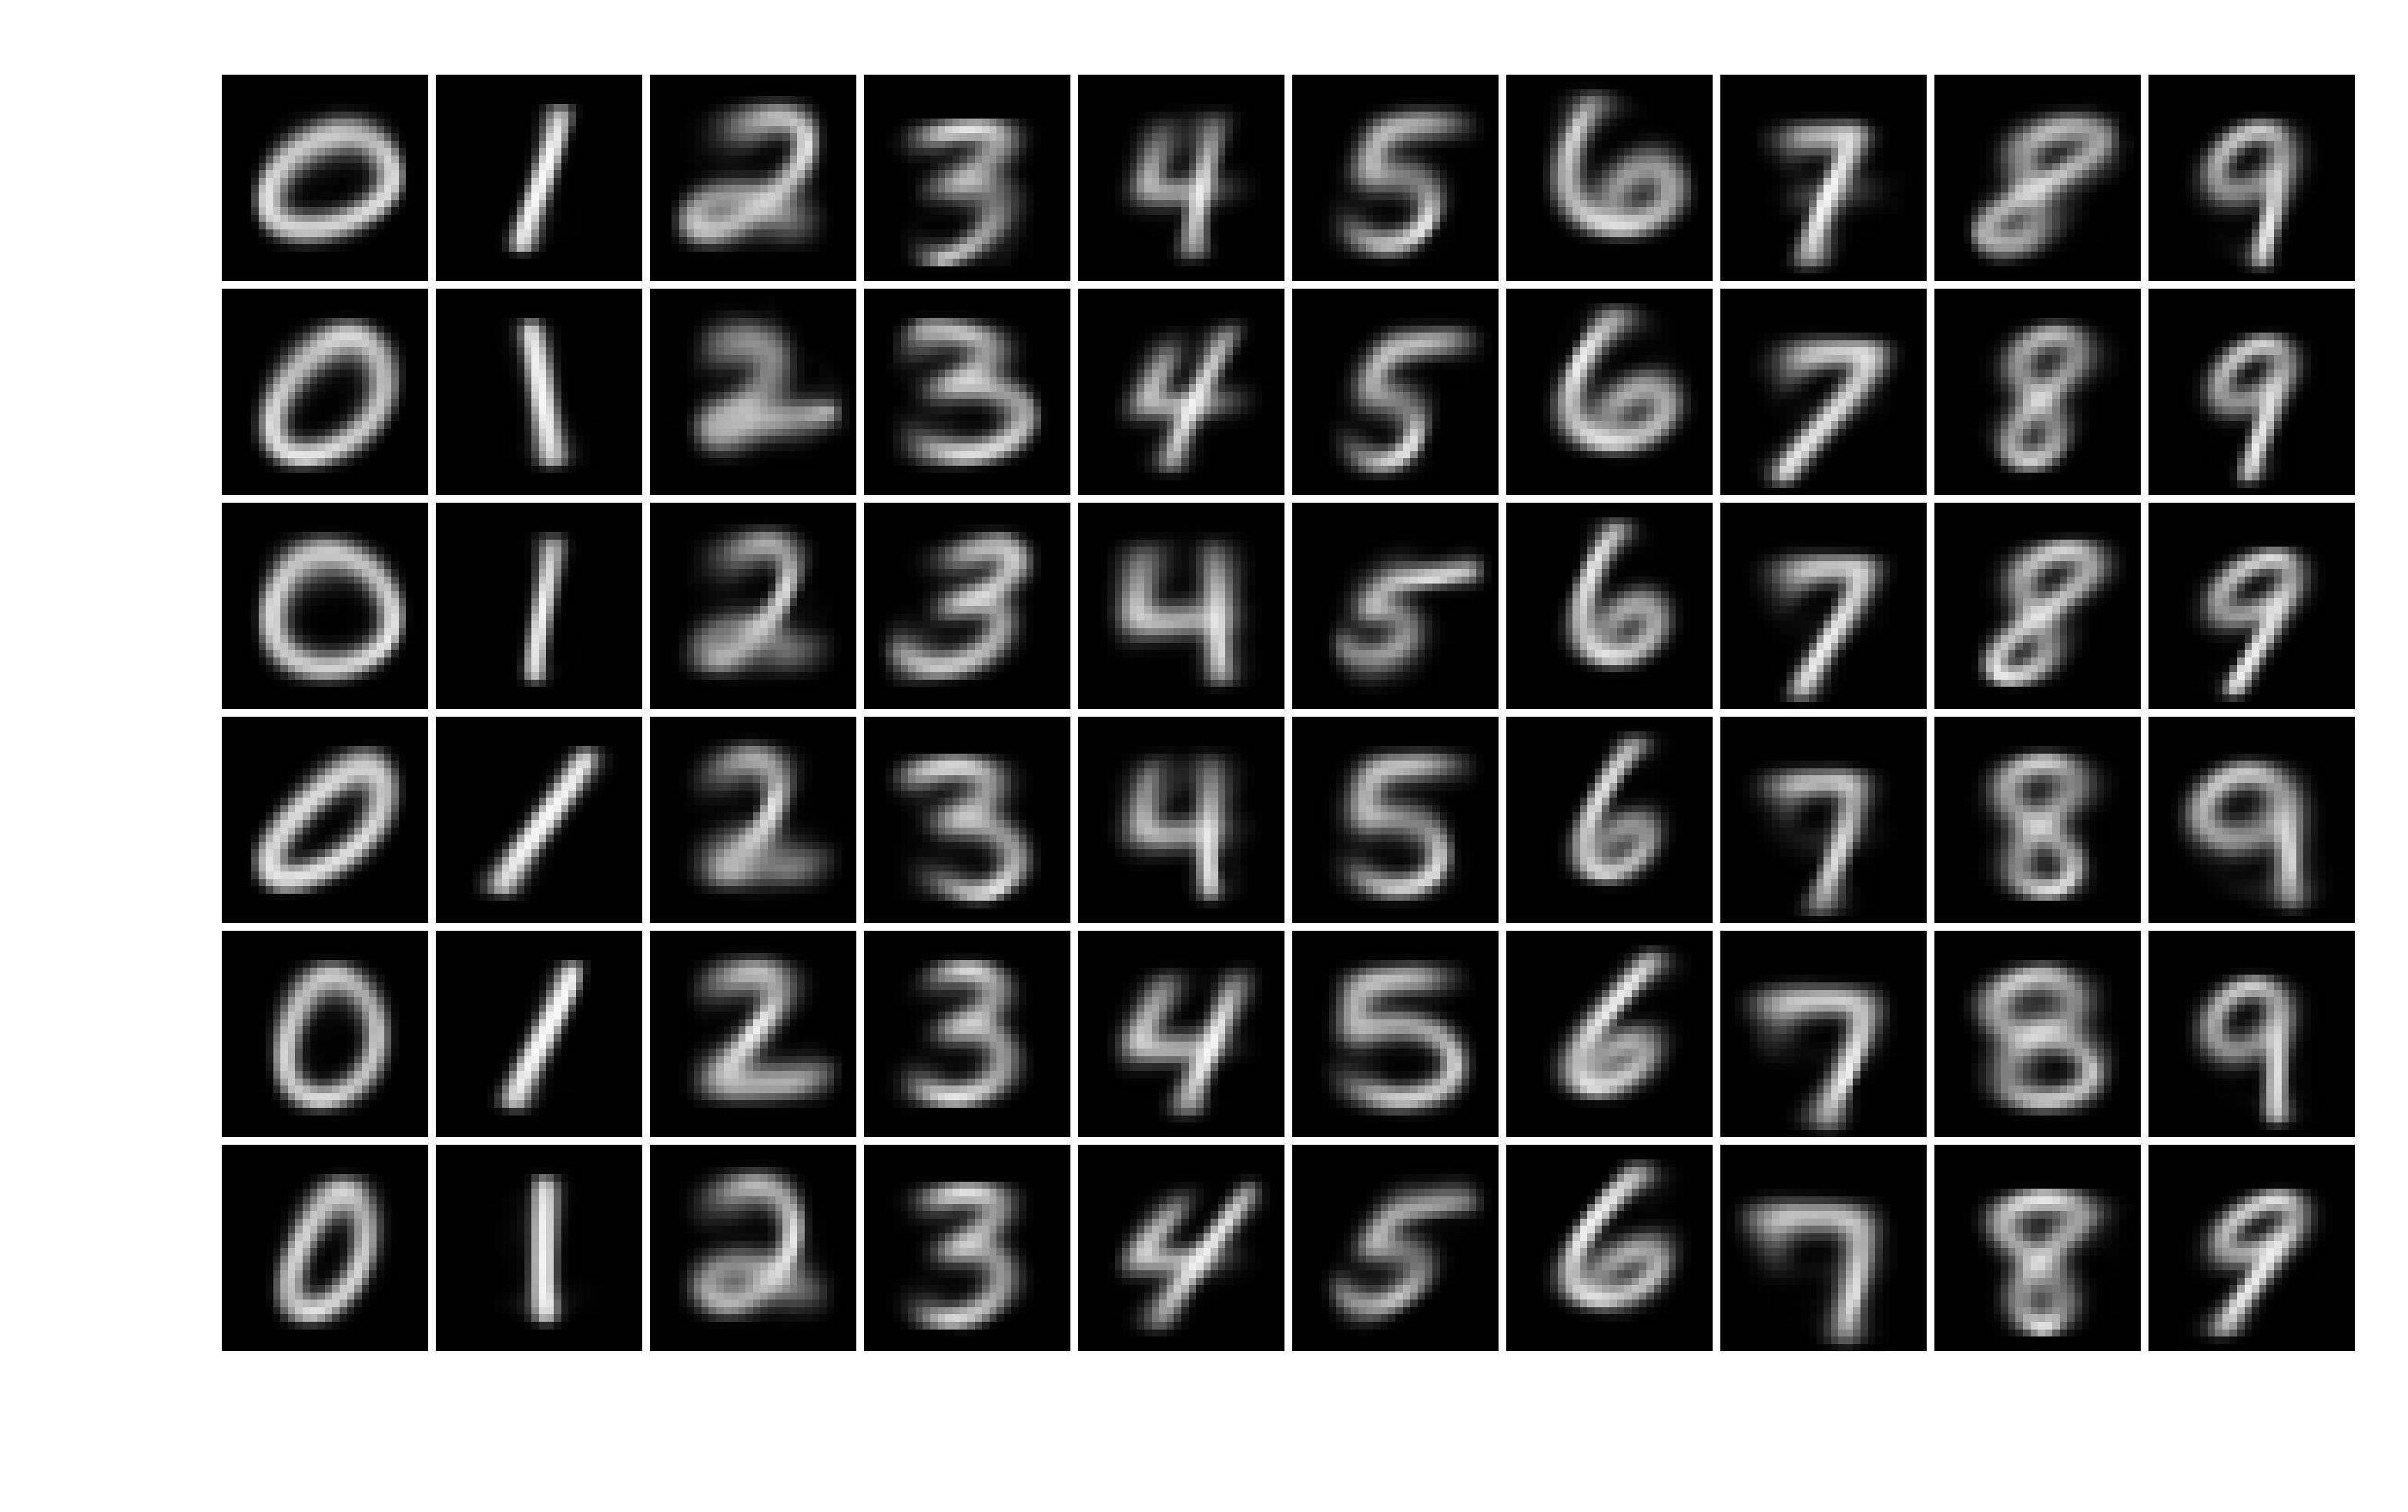

In [8]:
img = np.ones ([1+K*(height+1), 1+C * (width+1),3])
for c in range(C):
    for k in range (K):
        idx1 = k*(height+1)+1
        idx2 = c*(width+1)+1
        img[idx1:idx1+height, idx2:idx2+width,0] = means[c*K+k,:].reshape ([height,width])
        img[idx1:idx1+height, idx2:idx2+width,1] = img[idx1:idx1+height, idx2:idx2+width,0]
        img[idx1:idx1+height, idx2:idx2+width,2] = img[idx1:idx1+height, idx2:idx2+width,0]
plt.axis('off')
plt.imshow (img)
fn = 'mnist_gmm_clustering' + '.png'
plt.imsave(fn, img)        
plt.show()

### Compute within-cluster scatter

In [10]:
reg = 0.1
Xw = XTrain + 0
for n in range (N):
    Xw[n,:] -= means[clusters[n],:]
Sw = Xw.T @ Xw / N + np.diag(np.ones(784) * reg)

In [12]:
print (Sw[0,1])

0.0


### Compute bias and weights

In [13]:
Nck = np.bincount(clusters)
Pck = Nck / N

In [14]:
b = np.zeros (L)
sigmaInv = np.linalg.pinv(Sw)
for i in range (L):
    b[i] = np.log (Pck[i]) - 1/2 * means[i,:].T @ sigmaInv @ means[i,:]

In [15]:
W = np.zeros ([L, dim])
for i in range (L):
    W[i,:] =  sigmaInv @ means[i,:]

In [16]:
y = XTrain @ W.T + b
prediction = np.argmax (y, axis = 1) // K
score = np.sum(prediction == yTrain.squeeze())/ N
print ('Training Accuracy = ', score)

Training Accuracy =  0.8967833333333334


In [17]:
NTest = XTest.shape[0]
y = XTest @ W.T + b
prediction = np.argmax (y, axis = 1) // K
score = np.sum(prediction == yTest.squeeze().T)/ NTest
print ('Testing Accuracy = ', score)

Testing Accuracy =  0.8971


### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> </font>